## digit_recognizer 手写数字识别

手写数字识别作为机器学习的入门项目，非常手动各种模型，算法的青睐，新的算法，模型也首选该数据集作为用于测试。 
同时作为kaggle的入门题目，本篇博客打算使用kaggle提供的数据集，借助tensorflow， 使用基础API,高层API分别实现ANN， CNN， RNN， 
来进行数据训练和预测。

更基础的titanic项目：https://github.com/yunshuipiao/sw-kaggle/blob/master/titanic/01.ipynb

In [117]:
# 常用包的导入
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing
import sklearn.model_selection
import  matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import tensorflow as tf
# import warnings

In [118]:
# 加载数据
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')
sample_df = pd.read_csv('./datasets/sample_submission.csv')

In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [120]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [121]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


通过对数据简单的分析，可以知道：  
label是需要预测的结果，为0-9, pixel0-pixel783共计28*28个像素， 为输入特征， 范围在0-255之间，后续需要标准化数据.

## 数据可视化

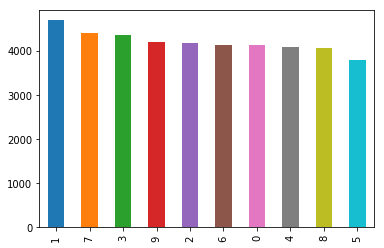

In [122]:
train_df['label'].value_counts().plot.bar()  #每个数字的预测分布

In [123]:
# 定义函数查看图片
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image)

9


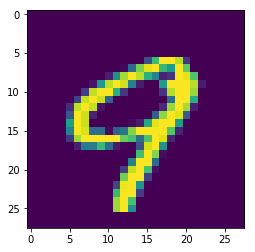

In [124]:
images = train_df.drop('label', axis=1).values
plot_digit(images[100])
print(train_df.iloc[100]['label'])

In [125]:
X_train = train_df[[i for i in train_df.columns if i not in ['label']]]
y_train = train_df['label']
X_test = test_df

## 数据处理

In [126]:
# 标准化数据， 查看前后对比结果
X_train = sklearn.preprocessing.scale(X_train)
X_test = sklearn.preprocessing.scale(X_test)

In [127]:
# PCA降维，查看前后对比结果

In [128]:
y_train_one_hot = pd.get_dummies(y_train, prefix='label')

In [129]:
y_train = y_train.values
y_train_one_hot = y_train_one_hot.values

In [130]:
# 切分数据为训练集和验证集
X_train, X_verify, y_train, y_verify, y_train_one_hot, y_verify_one_hot = sklearn.model_selection.train_test_split(X_train, 
                                                                                                                   y_train,
                                                                                                                   y_train_one_hot, 
                                                                                                                   stratify=y_train, 
                                                                                                                   test_size=0.1
                                                                                                                  )

In [131]:
type(y_train_one_hot)

numpy.ndarray

## 最基本的ANN

In [132]:
# 基本参数
learning_rate = 0.01
num_steps = 500
batch_size = 100
display_step = 100

In [170]:
# 神经网络参数
n_hidden_1 =500
n_hidden_2 = 100
num_input = 28 * 28
num_class = 10

In [171]:
# tf的输出
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_class])

In [172]:
# 保存每一册的权重
weights = {
    'h1':tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, num_class]))
}
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([num_class])),
}

In [173]:
# 创建神经网络模型
def neural_net(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [174]:
# 结果输出
logits = neural_net(X)

# 定义损失和优化器:交叉熵
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)  #根据学习率去最小化loss
train_op = optimizer.minimize(loss_op)  #训练操作

currect_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
 #上一条语句判断结果是否相等，结果为true or false。求均值即为预测的正确率
accuracy = tf.reduce_mean(tf.cast(currect_pred, tf.float32)) 

In [175]:
init = tf.global_variables_initializer()  #初始化所有的变量

In [176]:
# 开始训练
with tf.Session() as sess:
    sess.run(init) 
    for  step in range(num_steps):
        random_index = np.random.randint(0, X_train.shape[0] - batch_size)
        X_batch = X_train[random_index:random_index + batch_size]
        y_batch = y_train_one_hot[random_index:random_index + batch_size]
    
        sess.run(train_op, feed_dict={X:X_batch, Y:y_batch})
        
        if step % display_step == 0:
            # 计算损失和精确度
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X:X_batch, Y:y_batch})
            print("Step: ", step, 'Minibatch:', "{:.4f}".format(loss), 'Trainging Accuracy:', 
                  '{:.3}'.format(acc))
    print("Optimization Finished")
    acc_verify = sess.run(accuracy, feed_dict={X:X_verify, Y:y_verify_one_hot})
    print("Testing Accuracy: ", acc_verify)

Step:  0 Minibatch: 2814.4600 Trainging Accuracy: 0.39
Step:  100 Minibatch: 626.3727 Trainging Accuracy: 0.86
Step:  200 Minibatch: 784.3148 Trainging Accuracy: 0.86
Step:  300 Minibatch: 154.9960 Trainging Accuracy: 0.89
Step:  400 Minibatch: 422.3517 Trainging Accuracy: 0.86
Optimization Finished
Testing Accuracy:  0.8704762


In [ ]:
使用包含两个隐藏层的神经网络(500 ,100), 目前得到的结果精确度为87%。 接下来使用高级API， 同样的网络结构， 对比结果。

## 高级API实现ANN

In [236]:
# 定义输入数据
input_fn = tf.estimator.inputs.numpy_input_fn(x = X_train, y = y_train, batch_size=batch_size, 
                                             shuffle=True)

In [237]:
# 定义网络结构和输出
def neural_net(x):
    # 包含300个隐藏神经元的全连接层
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # 包含100个隐藏神经元的全连接层
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    out_layer = tf.layers.dense(layer_2, num_class)
    return out_layer

In [238]:
# 按照tf estimator 模板 定义模型函数
def model_fn(features, labels, mode):  # 函数格式要固定
    # 构建网络
    logits = neural_net(features)
    
    # 进行预测
    pred_classes = tf.argmax(logits, 1)
    pred_probas = tf.nn.softmax(logits)
    
    # 如果是预测过程，则返回
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)
    
    # 定义损失和优化器
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, 
                                                                           labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # 评估模型
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # estimator 需要返回一个 EstimatorSpec, 用于指定不同的操作过程，比如训练，评估等等。
    estim_specs = tf.estimator.EstimatorSpec(mode=mode, 
                                            predictions=pred_classes,
                                            loss=loss_op,
                                            train_op=train_op, 
                                            eval_metric_ops={'accuracy': acc_op})
    return estim_specs

In [239]:
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmp2i2g8ur7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a4189a5f8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [240]:
model.train(input_fn, steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmp2i2g8ur7/model.ckpt.
INFO:tensorflow:loss = 2.777676713568012, step = 1
INFO:tensorflow:global_step/sec: 158.353
INFO:tensorflow:loss = 0.5414028247454469, step = 101 (0.633 sec)
INFO:tensorflow:global_step/sec: 173.629
INFO:tensorflow:loss = 0.3345661211434318, step = 201 (0.576 sec)
INFO:tensorflow:global_step/sec: 170.627
INFO:tensorflow:loss = 0.5424020876248237, step = 301 (0.587 sec)
INFO:tensorflow:Saving checkpoints for 378 into /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmp2i2g8ur7/model.ckpt.
INFO:tensorflow:Loss for final step: 0.21339731465182388.


In [241]:
# 评估模型
input_fn = tf.estimator.inputs.numpy_input_fn(x=X_verify, y=y_verify, batch_size=batch_size, 
                                             shuffle=False)
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-07-03:14:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmp2i2g8ur7/model.ckpt-378
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-07-03:14:39
INFO:tensorflow:Saving dict for global step 378: accuracy = 0.89, global_step = 378, loss = 0.41753057


{'accuracy': 0.89, 'global_step': 378, 'loss': 0.41753057}

In [242]:
# 执行预测
n_images = 4
test_images = X_test[200:200 + n_images]
input_fn = tf.estimator.inputs.numpy_input_fn(x=test_images,
                                             shuffle=False)
preds = list(model.predict(input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmp2i2g8ur7/model.ckpt-378
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [243]:
preds

[1, 9, 0, 9]

In [244]:
# Display
# for i in range(n_images):
#     plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
#     plt.show()
#     print("Model prediction:", preds[i])

## 基础API实现卷积CNN

In [255]:
display_step = 50
dropout = 0.75

In [222]:
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_class])
keep_prob = tf.placeholder(tf.float32)  # dropout

In [231]:
# conv2d 卷积层 的简单包装
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [232]:
# 池化层的简单包装
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding="SAME")

In [233]:
# 创建模型
def conv_net(x, weights, biases, dropout):
    x = tf.reshape(x, shape=[-1, 28, 28, 1])
    # 卷积层1
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # 池化层
    conv1 = maxpool2d(conv1, k=2)

    # 卷积层2
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # 池化层
    conv2 = maxpool2d(conv2, k=2)

    # 全连接层
    # reshape conv2 ， 适合后面的全连接层
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    #  Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [234]:
# 参数 weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])), #7的由来，28*28经过k为2的池化层 28 / 4 =7
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, num_class]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_class]))
}

In [235]:
# 模型结构
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

In [251]:
# 定义损失和优化器
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, 
                                                                labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

In [252]:
# 评估模型
correct_pred = tf.equal(tf.argmax(prediction, 1) ,tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [253]:
# 全局初始化
init = tf.global_variables_initializer()

In [256]:
# 开始训练
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(0, 200):
        random_index = np.random.randint(0, X_train.shape[0] - batch_size)
        X_batch = X_train[random_index:random_index + batch_size]
        y_batch = y_train_one_hot[random_index:random_index + batch_size]
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: X_batch, Y: y_batch, keep_prob: dropout})
        if step % display_step == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: X_batch,
                                                                 Y: y_batch,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for 256 MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: X_verify,
                                      Y: y_verify_one_hot,
                                      keep_prob: 1.0}))

Step 0, Minibatch Loss= 185061.1406, Training Accuracy= 0.270
Step 50, Minibatch Loss= 3478.2024, Training Accuracy= 0.800
Step 100, Minibatch Loss= 2038.9086, Training Accuracy= 0.850
Step 150, Minibatch Loss= 300.2524, Training Accuracy= 0.950
Optimization Finished!
Testing Accuracy: 0.9173809


## 使用高级API实现CNN

In [290]:
learning_rate = 0.001
num_steps = 500
batch_size = 100

In [291]:
dropout = 0.25

In [292]:
def conv_net(x, num_class, dropout, reuse, is_training):
    with tf.variable_scope("ConvNet", reuse=reuse):
        x = tf.reshape(x, shape=[-1, 28 ,28, 1])
        # 卷积核5，32个输出的卷积层
        conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
        # 池化层， 核为2, 步长为2
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)

        
        conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)

        # flatten最后一个卷积层，用于全连接的层的输入
        fc1 = tf.contrib.layers.flatten(conv2)

        # 全连接层
        fc1 = tf.layers.dense(fc1, 1024)
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training) #训练是才用dropout

        out = tf.layers.dense(fc1, num_class)

    return out

In [293]:
# 固定样式的model_fn
def model_fn(features, labels, mode):
    logits_train = conv_net(features, num_class, dropout, reuse=False, is_training=True)
    logits_test = conv_net(features, num_class, dropout, reuse=True, is_training=False)
    
    # 预测
    pred_class = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)
    
    # 如果是预测,直接返回
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_class)
    
    # 定义损失和优化器
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_class)
    
    estim_specs = tf.estimator.EstimatorSpec(mode=mode, 
                                            predictions=pred_class, 
                                            loss = loss_op, 
                                            train_op=train_op, 
                                            eval_metric_ops={'accuracy':acc_op})
    return estim_specs

In [294]:
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmp3b0t09wo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1aa9a54780>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [295]:
# 定义输入数据
input_fn = tf.estimator.inputs.numpy_input_fn(x = X_train, y = y_train, batch_size=batch_size, 
                                             shuffle=True)

In [296]:
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmp3b0t09wo/model.ckpt.
INFO:tensorflow:loss = 2.2926665544370017, step = 1
INFO:tensorflow:global_step/sec: 9.30182
INFO:tensorflow:loss = 0.22218930369778753, step = 101 (10.752 sec)
INFO:tensorflow:global_step/sec: 9.22374
INFO:tensorflow:loss = 0.2304007596404654, step = 201 (10.842 sec)
INFO:tensorflow:global_step/sec: 9.10504
INFO:tensorflow:loss = 0.07587352256281946, step = 301 (10.983 sec)
INFO:tensorflow:Saving checkpoints for 378 into /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmp3b0t09wo/model.ckpt.
INFO:tensorflow:Loss for final step: 0.04748502598363536.


In [297]:
# 评估模型
input_fn = tf.estimator.inputs.numpy_input_fn(x = X_verify, y = y_verify, batch_size=batch_size, 
                                             shuffle=True)
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-07-06:32:15
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmp3b0t09wo/model.ckpt-378
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-07-06:32:17
INFO:tensorflow:Saving dict for global step 378: accuracy = 0.9802381, global_step = 378, loss = 0.062364955


{'accuracy': 0.9802381, 'global_step': 378, 'loss': 0.062364955}

In [298]:
# 执行预测
n_images = 4
test_images = X_test[200:200 + n_images]
input_fn = tf.estimator.inputs.numpy_input_fn(x=test_images,
                                             shuffle=False)
preds = list(model.predict(input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmp3b0t09wo/model.ckpt-378
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [299]:
preds

[1, 9, 0, 9]

## 使用RNN进行训练

In [300]:
from tensorflow.contrib import rnn

In [312]:

# Training Parameters# Train 
learning_rate = 0.01
training_steps = 1000
batch_size = 128
display_step = 200

# Network Parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_hidden = 128 # hidden layer num of features
num_classes = 10 # MNIST total classes (0-9 digits)

In [313]:
# tf Graph input
X = tf.placeholder("float", [None, timesteps, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [314]:

# Define weights# Defin 
weights = {
    'out': tf.Variable(tf.random_normal([num_hidden, num_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [328]:
def RNN(x, weights, biases):
    with tf.variable_scope("RNN_Net", reuse=tf.AUTO_REUSE):
    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, timesteps, n_input)
    # Required shape: 'timesteps' tensors list of shape (batch_size, n_input)

    # Unstack to get a list of 'timesteps' tensors of shape (batch_size, n_input)
        x = tf.unstack(x, timesteps, 1)

    # Define a lstm cell with tensorflow
        lstm_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)

    # Get lstm cell output
        outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

In [329]:

logits = RNN(X, weights, biases)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [331]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(training_steps):
        random_index = np.random.randint(0, X_train.shape[0] - batch_size)
        X_batch = X_train[random_index:random_index + batch_size]
        X_batch = X_batch.reshape((batch_size, timesteps, num_input))
        y_batch = y_train_one_hot[random_index:random_index + batch_size]
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: X_batch, Y: y_batch})
        if step % display_step == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: X_batch,
                                                                 Y: y_batch})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = X_verify.reshape((-1, timesteps, num_input))
    test_label = y_verify_one_hot
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: test_data, Y: test_label}))

Step 0, Minibatch Loss= 2.3403, Training Accuracy= 0.195
Step 200, Minibatch Loss= 0.8850, Training Accuracy= 0.758
Step 400, Minibatch Loss= 0.5068, Training Accuracy= 0.844
Step 600, Minibatch Loss= 0.4788, Training Accuracy= 0.836
Step 800, Minibatch Loss= 0.3692, Training Accuracy= 0.891
Optimization Finished!
Testing Accuracy: 0.8869048


### lightgbm 的简单使用

In [351]:
import lightgbm as lgb
# d_train = lgb.Dataset(X_train, label=y_train)
params = {'learning_rate': 0.1, 'max_depth': 7, 'boosting': 'gbdt', 'num_class':10,
          'objective': 'multiclass','metric': 'multi_logloss'}
# lgb_clf = lgb.train(params, d_train, 100)


In [353]:
# 加入提前停止
lgb_model = lgb.train(params, lgb.Dataset(X_train, label=y_train), 100, 
                     lgb.Dataset(X_verify, label=y_verify), early_stopping_rounds=5)

[1]	valid_0's multi_logloss: 1.95853
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 1.72898
[3]	valid_0's multi_logloss: 1.55256
[4]	valid_0's multi_logloss: 1.40923
[5]	valid_0's multi_logloss: 1.29038
[6]	valid_0's multi_logloss: 1.18774
[7]	valid_0's multi_logloss: 1.09991
[8]	valid_0's multi_logloss: 1.02254
[9]	valid_0's multi_logloss: 0.953077
[10]	valid_0's multi_logloss: 0.890703
[11]	valid_0's multi_logloss: 0.834663
[12]	valid_0's multi_logloss: 0.784026
[13]	valid_0's multi_logloss: 0.738359
[14]	valid_0's multi_logloss: 0.696748
[15]	valid_0's multi_logloss: 0.658467
[16]	valid_0's multi_logloss: 0.623458
[17]	valid_0's multi_logloss: 0.591591
[18]	valid_0's multi_logloss: 0.563061
[19]	valid_0's multi_logloss: 0.536567
[20]	valid_0's multi_logloss: 0.51122
[21]	valid_0's multi_logloss: 0.488629
[22]	valid_0's multi_logloss: 0.467814
[23]	valid_0's multi_logloss: 0.448075
[24]	valid_0's multi_logloss: 0.430339
[25]	valid_0's multi_

In [363]:
# 提前停止得到最佳参数
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

In [364]:
y_pred = np.argmax(y_pred, axis=1)

In [369]:
sample_df['Label'] = y_pred
sample_df.to_csv('./lgb_result.csv', index=False)